# 12/09/2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("fivethirtyeight")

# **S3_L6** 

Pareto chart

In [2]:
cars = pd.DataFrame({"Frequency": [124, 98, 113]}, index = ["Audi", "BMW", "Mercedes"])

cars # we are going to see the frequency of sells per brand

,Frequency
Audi,124
BMW,98
Mercedes,113


In [3]:
cars["Frequency"].apply(lambda x : round((x * 100) /cars["Frequency"].sum()))

Audi        37
BMW         29
Mercedes    34
Name: Frequency, dtype: int64

In [4]:
cars["Relative_Frequency"] = cars["Frequency"].apply(lambda x : round((x * 100) /cars["Frequency"].sum()))

In [5]:
cars = cars.sort_values("Frequency", ascending = False)
cars

,Frequency,Relative_Frequency
Audi,124,37
Mercedes,113,34
BMW,98,29


In [6]:
cars["Relative_Frequency"].cumsum() # with this function we can set the cumulative frequency

Audi         37
Mercedes     71
BMW         100
Name: Relative_Frequency, dtype: int64

In [7]:
cars["Cumulative_Frequency"] = cars["Relative_Frequency"].cumsum() 

In [8]:
cars

,Frequency,Relative_Frequency,Cumulative_Frequency
Audi,124,37,37
Mercedes,113,34,71
BMW,98,29,100


**Now let's plot a pareto diagram**

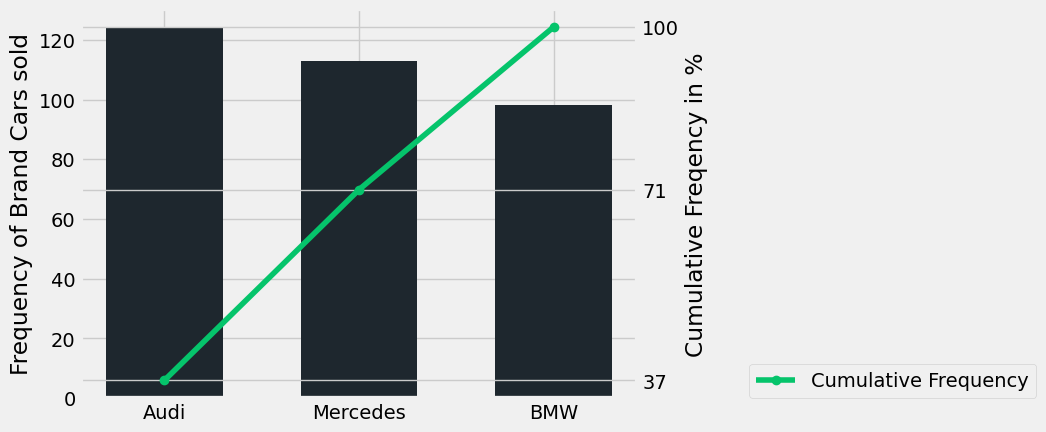

In [9]:
fig, ax1 = plt.subplots()

ax1.bar(data = cars, x = cars.index, height = cars["Frequency"], color = "#1e272e", label ="Frequency", width = 0.6)
ax1.set_ylabel("Frequency of Brand Cars sold")

ax2 = ax1.twinx() # this method is to place two y axes in the same plot, on the left and on the right.

ax2.plot(cars["Cumulative_Frequency"], color = "#05c46b", marker = "o", label = "Cumulative Frequency")
ax2.set_ylabel("Cumulative Freqency in %")
ax2.set_yticks(cars["Cumulative_Frequency"])

plt.legend(loc = (1.2, 0))
plt.show()

# S3_L7

In [10]:
cities = pd.DataFrame({"Frequency": [12327, 17129, 19223]}, index = ["NY", "LA", "SF"])
cities

,Frequency
NY,12327
LA,17129
SF,19223


# **S3_L9**

Frequency distribution table exercise

In [11]:
Dataset = pd.read_excel("S3_L9\\distribution_table.xlsx")
Dataset.head()

,Dataset
0,8
1,30
2,30
3,50
4,86


**1. Given that we want to divide the numbers into 6 intervals of equal width, calculate that interval width. Round up to the nearest whole number, bigger than the result that you obtain**									

In [12]:
Dataset.max()

Dataset    282
dtype: int64

In [13]:
Dataset.min()

Dataset    8
dtype: int64

In [14]:
round((Dataset.max() - Dataset.min()) / 6) # <-- this is the formula to divide equally the desired intervals by 6

Dataset    46.0
dtype: float64

**2.Create a frequency distribution table that shows** 		

1. The intervals 		
2. The absolute frequency of each interval
3. The relative frequency of each interval

In [15]:
Dataset.head()

,Dataset
0,8
1,30
2,30
3,50
4,86


**Intervals**

In [16]:
pd.cut(Dataset["Dataset"], bins = 6).astype(str)

0        (7.726, 53.667]
1        (7.726, 53.667]
2        (7.726, 53.667]
3        (7.726, 53.667]
4       (53.667, 99.333]
5       (53.667, 99.333]
6        (99.333, 145.0]
7        (99.333, 145.0]
8       (145.0, 190.667]
9       (145.0, 190.667]
10      (145.0, 190.667]
11    (190.667, 236.333]
12      (236.333, 282.0]
13      (236.333, 282.0]
14      (236.333, 282.0]
15      (236.333, 282.0]
16      (236.333, 282.0]
17      (236.333, 282.0]
18      (236.333, 282.0]
19      (236.333, 282.0]
Name: Dataset, dtype: object

In [17]:
intervals = pd.cut(Dataset["Dataset"], bins = 6).astype(str)

# here we create the absolute and relative frequency
absolute = intervals.value_counts()
relative = intervals.value_counts(normalize = True)

intervals = pd.DataFrame(intervals)

intervals = intervals[intervals["Dataset"].duplicated() == False]

intervals

,Dataset
0,"(7.726, 53.667]"
4,"(53.667, 99.333]"
6,"(99.333, 145.0]"
8,"(145.0, 190.667]"
11,"(190.667, 236.333]"
12,"(236.333, 282.0]"


In [18]:
intervals = intervals["Dataset"].str.split(",", expand = True)

In [19]:
intervals = intervals.rename(columns = {0 : "interval_start", 1 :  "intervals_ends"})

In [20]:
intervals["interval_start"] = intervals["interval_start"].apply(lambda x : x[1:])

intervals["intervals_ends"] = intervals["intervals_ends"].apply(lambda x : x.replace("]", ""))

intervals

,interval_start,intervals_ends
0,7.726,53.667
4,53.667,99.333
6,99.333,145.0
8,145.0,190.667
11,190.667,236.333
12,236.333,282.0


**Combining**

In [21]:
# we need to match the index of relative and absolute for aligment 
absolute.index = intervals.index
relative.index = intervals.index

absolute = absolute.rename("absolute_frequency")
relative = relative.rename("relative_frequency")

In [22]:
pd.concat([intervals, absolute, relative], axis = 1)

,interval_start,intervals_ends,absolute_frequency,relative_frequency
0,7.726,53.667,8,0.40
4,53.667,99.333,4,0.20
6,99.333,145.0,3,0.15
8,145.0,190.667,2,0.10
11,190.667,236.333,2,0.10
12,236.333,282.0,1,0.05


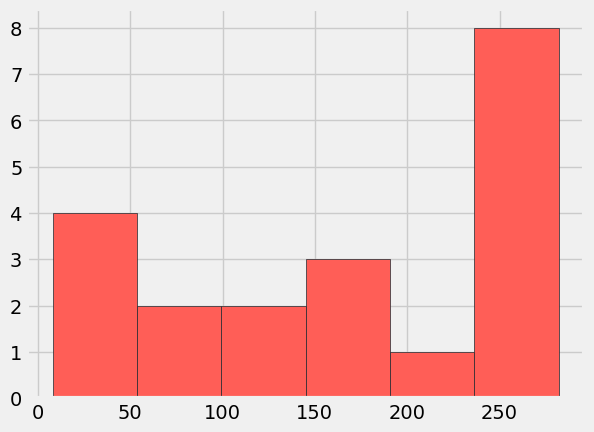

In [23]:
plt.hist(Dataset, bins = 6, color = "#ff5e57", edgecolor = "#1e272e")
plt.show()

# **S3_L13**

Background:

You have employment data about country X. You have been asked to prepare a cross-table showing that data.												
1. 60% of 18 to 25-year-olds are employed												
2. 85% of 25 to 35-year-olds are employed												
3. 5% of 35 to 45-year-olds are unemployed												
4. 3% of 45 to 55-year-olds are unemployed												
5. 3% of 55 to 65-year-olds are unemployed												
6. All 65+ are employed. Note: the definition of unemployed is: without a job, but actively searching for one. That's probably why all 65+s are employed.												

Task 1	Create a cross table summarizing the data you have been given.												

Task 2	Create a side-by-side bar chart (it is called clustered column chart in Excel), in order to visually enhance your summary.												

In [24]:
employment = pd.DataFrame({"Employed" : [60, 85, 95, 97, 97, 100]}, 
             index = ["18-25", "25-35", "35-45", "45-55", "55-65", "+65"])

employment.index.names = ["employment %"]

In [25]:
employment["Unemployed"] = 100 - employment["Employed"]

In [26]:
employment

,Employed,Unemployed
employment %,,
18-25,60,40
25-35,85,15
35-45,95,5
45-55,97,3
55-65,97,3
+65,100,0


In [27]:
employment["total"] = employment["Employed"] + employment["Unemployed"]

In [28]:
employment.loc["total", ["Employed"]] = employment["Employed"].sum() 

employment.loc["total", ["Unemployed"]] = employment["Unemployed"].sum() 

employment.loc["total", ["total"]] = employment["total"].sum() 

In [29]:
employment

,Employed,Unemployed,total
employment %,,,
18-25,60.0,40.0,100.0
25-35,85.0,15.0,100.0
35-45,95.0,5.0,100.0
45-55,97.0,3.0,100.0
55-65,97.0,3.0,100.0
+65,100.0,0.0,100.0
total,534.0,66.0,600.0


**Create a side-by-side bar chart (it is called clustered column chart in Excel), in order to visually enhance your summary.**

In [30]:
employment = employment.drop("total", axis = 0)
employment

,Employed,Unemployed,total
employment %,,,
18-25,60.0,40.0,100.0
25-35,85.0,15.0,100.0
35-45,95.0,5.0,100.0
45-55,97.0,3.0,100.0
55-65,97.0,3.0,100.0
+65,100.0,0.0,100.0


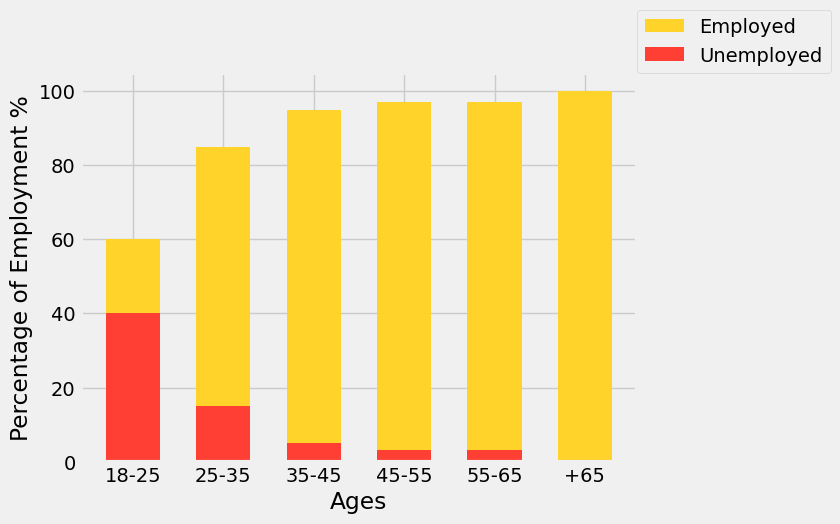

In [31]:
plt.bar(x = employment.index, height = employment["Employed"], color = "#ffd32a", label = "Employed", width = 0.6)

plt.bar(x = employment.index, height = employment["Unemployed"], color = "#ff3f34", label = "Unemployed", width = 0.6)

plt.legend(loc = (1, 1))
plt.xlabel("Ages")
plt.ylabel("Percentage of Employment %")
plt.show()

# Ended 14/09/2023